<a href="https://colab.research.google.com/github/anadiedrichs/curso-aprendizaje-automatico/blob/main/preprocesamiento_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de Datos Tabulares para Aprendizaje Automático

En este notebook, exploraremos la importancia del preprocesamiento de datos tabulares en Python utilizando la biblioteca scikit-learn (sklearn). El preprocesamiento es una etapa fundamental en cualquier proyecto de aprendizaje automático, ya que la calidad de los datos determina en gran medida el rendimiento de nuestros modelos.

## ¿Por qué es importante el preprocesamiento?

1. **Mejora el rendimiento de los modelos**: Muchos algoritmos de aprendizaje automático funcionan mejor con datos limpios y bien formateados.
2. **Reduce el tiempo de entrenamiento**: Datos optimizados aceleran el proceso de entrenamiento.
3. **Elimina sesgos y errores**: Corrige problemas que podrían llevar a conclusiones incorrectas.
4. **Mejora la interpretabilidad**: Datos bien procesados facilitan el entendimiento de los resultados.

Vamos a cubrir las siguientes técnicas de preprocesamiento:
- Importación y exploración inicial de datos
- Manejo de valores faltantes
- Codificación de variables categóricas
- Escalado de características
- Detección y tratamiento de valores atípicos (outliers)
- Selección de características
- Creación de pipelines de preprocesamiento

¡Comencemos!

## 1. Importamos las bibliotecas necesarias

Lo primero que debemos hacer es importar las bibliotecas que utilizaremos a lo largo del notebook. Estas nos proporcionarán las herramientas necesarias para manipular, analizar y visualizar nuestros datos.

In [1]:
# Importamos las bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuramos visualizaciones más atractivas
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style="whitegrid")

# Importamos módulos específicos de scikit-learn para preprocesamiento
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif

# Para detectar outliers
from sklearn.ensemble import IsolationForest

# Para verificar el rendimiento de nuestros modelos
from sklearn.metrics import accuracy_score, confusion_matrix

# Algunos modelos sencillos para demostrar el impacto del preprocesamiento
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Para evitar warnings innecesarios
import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'numpy'

## 2. Carga y exploración inicial de datos

Ahora vamos a cargar un conjunto de datos y explorarlo para entender su estructura y características. Para este ejemplo, utilizaremos el famoso conjunto de datos Titanic, que contiene información sobre los pasajeros del Titanic e incluye si sobrevivieron o no al hundimiento.

In [ ]:
# Cargamos los datos del Titanic (lo descargamos desde seaborn)
titanic = sns.load_dataset('titanic')

# Mostramos las primeras filas del conjunto de datos
print("Primeras 5 filas del conjunto de datos:")
titanic.head()

Primeras 5 filas del conjunto de datos:


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Ahora, vamos a explorar un poco más el conjunto de datos para entender su estructura y las características disponibles.

In [ ]:
# Información general sobre el conjunto de datos
print("Información general sobre el conjunto de datos:")
titanic.info()

Información general sobre el conjunto de datos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [ ]:
# Estadísticas descriptivas de las variables numéricas
print("Estadísticas descriptivas de las variables numéricas:")
titanic.describe()

Estadísticas descriptivas de las variables numéricas:


,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
# Verificamos los valores faltantes en cada columna
print("Cantidad de valores faltantes por columna:")
titanic.isnull().sum()

Cantidad de valores faltantes por columna:


,0
survived,0
pclass,0
sex,0
age,177
sibsp,0
parch,0
fare,0
embarked,2
class,0
who,0


Visualicemos la distribución de algunas variables importantes para entender mejor nuestros datos.

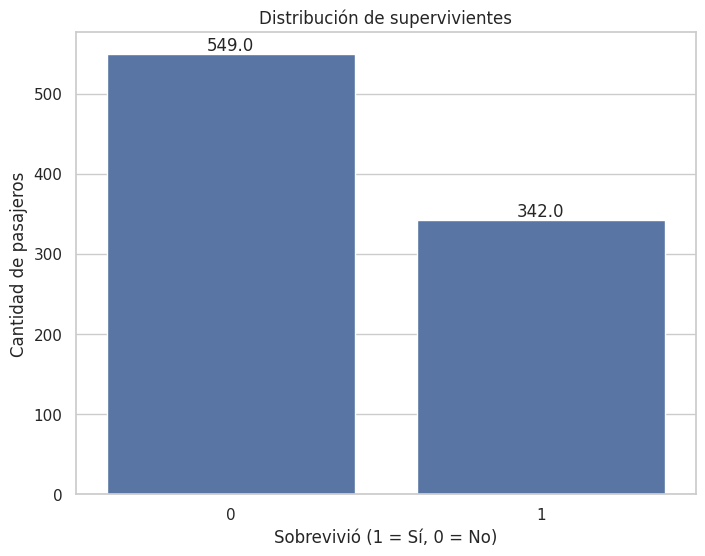

In [ ]:
# Visualizamos la distribución de la variable objetivo (survived)
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='survived', data=titanic)
plt.title("Distribución de supervivientes")
plt.xlabel("Sobrevivió (1 = Sí, 0 = No)")
plt.ylabel("Cantidad de pasajeros")

# Añadimos etiquetas con los valores exactos
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')
plt.show()

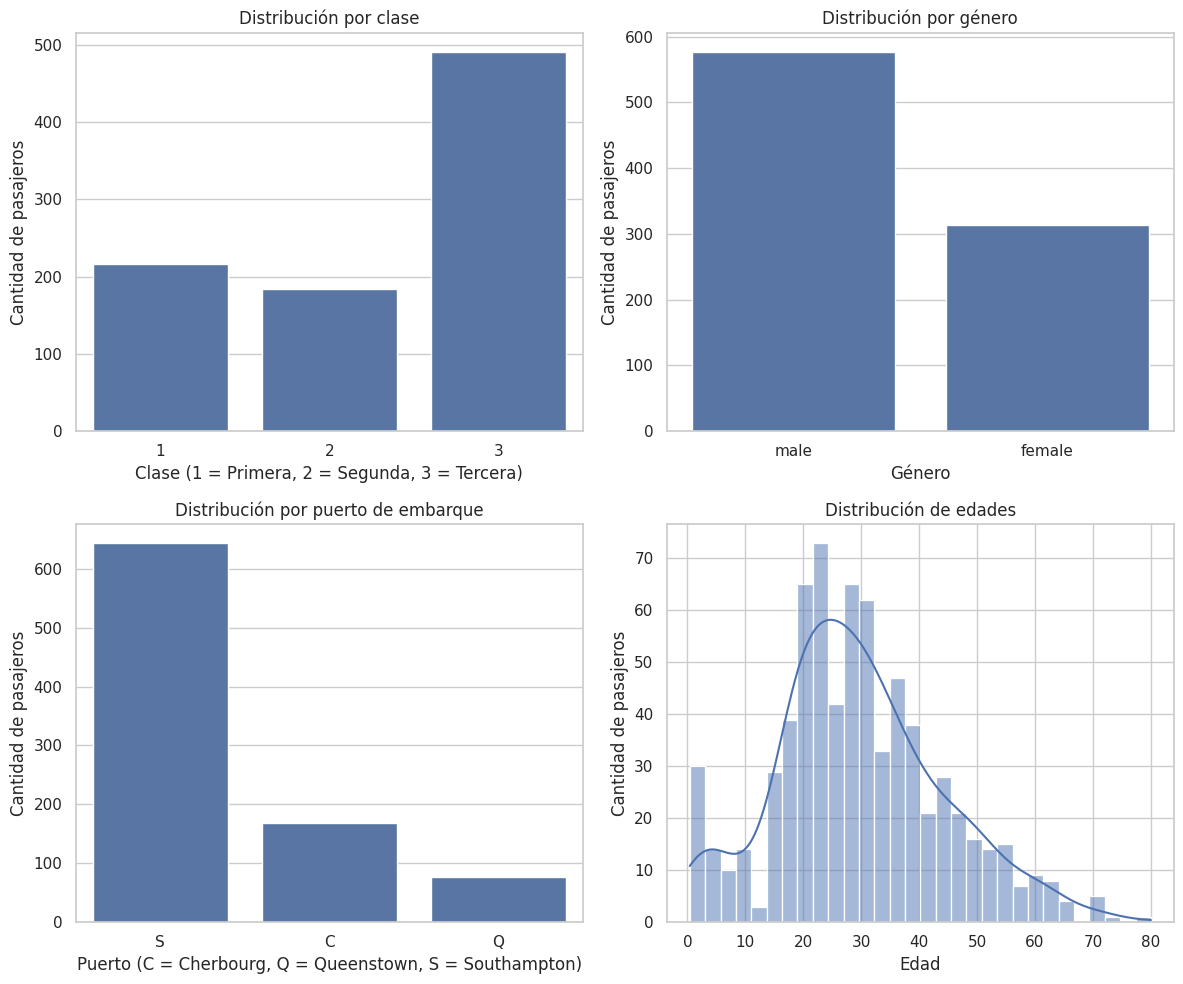

In [ ]:
# Visualizamos la distribución de algunas variables categóricas
plt.figure(figsize=(12, 10))

# Clase
plt.subplot(2, 2, 1)
sns.countplot(x='pclass', data=titanic)
plt.title("Distribución por clase")
plt.xlabel("Clase (1 = Primera, 2 = Segunda, 3 = Tercera)")
plt.ylabel("Cantidad de pasajeros")

# Género
plt.subplot(2, 2, 2)
sns.countplot(x='sex', data=titanic)
plt.title("Distribución por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de pasajeros")

# Puerto de embarque
plt.subplot(2, 2, 3)
sns.countplot(x='embarked', data=titanic)
plt.title("Distribución por puerto de embarque")
plt.xlabel("Puerto (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Cantidad de pasajeros")

# Edad
plt.subplot(2, 2, 4)
sns.histplot(data=titanic, x='age', bins=30, kde=True)
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Cantidad de pasajeros")

plt.tight_layout()
plt.show()

## 3. Manejo de Valores Faltantes

Como hemos visto, existen valores faltantes en nuestro conjunto de datos. El manejo adecuado de estos valores es crucial para evitar problemas en la fase de modelado. Vamos a explorar diferentes estrategias para tratar estos valores faltantes.

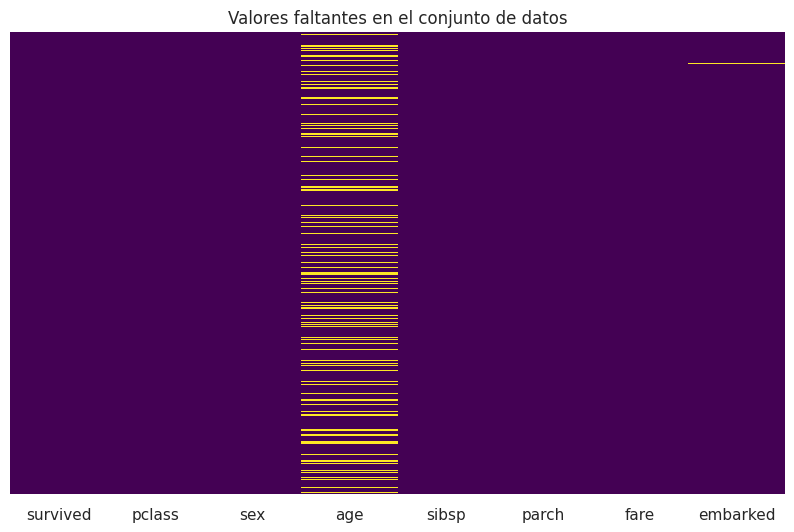

In [ ]:
# Creamos una copia del conjunto de datos para no modificar el original
df = titanic.copy()

# Simplificamos el conjunto de datos para enfocarnos en las columnas más relevantes
df = df[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Visualizamos los valores faltantes
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, yticklabels=False, cmap='viridis')
plt.title("Valores faltantes en el conjunto de datos")
plt.show()

### 3.1. Estrategia 1: Imputación con valores constantes

Una estrategia simple es reemplazar los valores faltantes con un valor constante como la media, mediana o moda. Scikit-learn proporciona la clase `SimpleImputer` para esta tarea.

In [ ]:
# Imputación de la edad con la media
imputer_mean = SimpleImputer(strategy='mean')
df_imputed_mean = df.copy()
df_imputed_mean['age'] = imputer_mean.fit_transform(df[['age']])



In [ ]:
df[['embarked']]

,embarked
0,S
1,C
2,S
3,S
4,S
...,...
886,S
887,S
888,S
889,C


In [ ]:
# Imputación del puerto de embarque con la moda
# imputer_mode = SimpleImputer(strategy='most_frequent')
# df_imputed_mean['embarked'] = imputer_mode.fit_transform(df[['embarked']])
# para solucionar el error que tira este bloque, agregué el .ravel que se ve abajo.

In [ ]:
# Imputación del puerto de embarque con la moda
imputer_mode = SimpleImputer(strategy='most_frequent')
# The fit_transform method returns a 2D array, we need to flatten it to 1D
df_imputed_mean['embarked'] = imputer_mode.fit_transform(df[['embarked']]).ravel()

In [ ]:

# Verificamos que no haya valores faltantes
print("Valores faltantes después de la imputación:")
print(df_imputed_mean.isnull().sum())

Valores faltantes después de la imputación:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


### 3.2. Estrategia 2: Imputación basada en KNN

Otra estrategia más sofisticada es usar el algoritmo de K vecinos más cercanos (KNN) para imputar valores faltantes basados en registros similares. Scikit-learn proporciona la clase `KNNImputer` para esta tarea.

In [ ]:
# Primero, necesitamos codificar las variables categóricas para usar KNNImputer
df_knn = df.copy()
df_knn['sex'] = df_knn['sex'].map({'male': 0, 'female': 1})
df_knn['embarked'] = df_knn['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# Aplicamos KNNImputer
imputer_knn = KNNImputer(n_neighbors=5)
df_knn_imputed = pd.DataFrame(imputer_knn.fit_transform(df_knn),
                              columns=df_knn.columns,
                              index=df_knn.index)

# Convertimos las columnas categóricas de vuelta a su forma original
df_knn_imputed['sex'] = df_knn_imputed['sex'].round().map({0: 'male', 1: 'female'})
df_knn_imputed['embarked'] = df_knn_imputed['embarked'].round().map({0: 'C', 1: 'Q', 2: 'S'})

# Verificamos que no haya valores faltantes
print("Valores faltantes después de la imputación KNN:")
print(df_knn_imputed.isnull().sum())

Valores faltantes después de la imputación KNN:
survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


## 4. Codificación de Variables Categóricas

La mayoría de los algoritmos de aprendizaje automático requieren que todas las variables sean numéricas. Por lo tanto, necesitamos convertir nuestras variables categóricas (como 'sex' y 'embarked') en representaciones numéricas.

### 4.1. Label Encoding

El Label Encoding convierte cada categoría en un valor numérico único. Es simple pero puede introducir un orden artificial entre categorías.

In [ ]:
# Aplicamos Label Encoding a las variables categóricas
df_label = df_imputed_mean.copy()
label_encoder = LabelEncoder()

df_label['sex'] = label_encoder.fit_transform(df_label['sex'])
df_label['embarked'] = label_encoder.fit_transform(df_label['embarked'])

print("Conjunto de datos después de Label Encoding:")
print(df_label.head())

Conjunto de datos después de Label Encoding:
   survived  pclass  sex   age  sibsp  parch     fare  embarked
0         0       3    1  22.0      1      0   7.2500         2
1         1       1    0  38.0      1      0  71.2833         0
2         1       3    0  26.0      0      0   7.9250         2
3         1       1    0  35.0      1      0  53.1000         2
4         0       3    1  35.0      0      0   8.0500         2


### 4.2. One-Hot Encoding

El One-Hot Encoding crea una nueva columna binaria para cada categoría. Es más apropiado cuando no hay un orden inherente entre las categorías.

In [ ]:
# Aplicamos One-Hot Encoding a las variables categóricas
df_onehot = df_imputed_mean.copy()

# One-Hot Encoding para 'sex'
df_onehot = pd.get_dummies(df_onehot, columns=['sex'], drop_first=True)

# One-Hot Encoding para 'embarked'
df_onehot = pd.get_dummies(df_onehot, columns=['embarked'], drop_first=True)

print("Conjunto de datos después de One-Hot Encoding:")
print(df_onehot.head())

Conjunto de datos después de One-Hot Encoding:
   survived  pclass   age  sibsp  parch     fare  sex_male  embarked_Q  \
0         0       3  22.0      1      0   7.2500      True       False   
1         1       1  38.0      1      0  71.2833     False       False   
2         1       3  26.0      0      0   7.9250     False       False   
3         1       1  35.0      1      0  53.1000     False       False   
4         0       3  35.0      0      0   8.0500      True       False   

   embarked_S  
0        True  
1       False  
2        True  
3        True  
4        True  


## 5. Escalado de Características

Muchos algoritmos de aprendizaje automático funcionan mejor cuando las características tienen la misma escala. Vamos a explorar diferentes métodos de escalado.

### 5.1. Estandarización (StandardScaler)

La estandarización resta la media y divide por la desviación estándar, resultando en una distribución con media 0 y desviación estándar 1.

In [ ]:
# Aplicamos StandardScaler a las variables numéricas
df_standard = df_label.copy()
scaler = StandardScaler()

# Separamos variables objetivo y predictores
X = df_standard.drop('survived', axis=1)
y = df_standard['survived']

# Aplicamos el escalado
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la estandarización:")
print(X_scaled_df.describe().round(2))

Estadísticas descriptivas después de la estandarización:
       pclass     sex     age   sibsp   parch    fare  embarked
count  891.00  891.00  891.00  891.00  891.00  891.00    891.00
mean    -0.00   -0.00    0.00    0.00    0.00    0.00     -0.00
std      1.00    1.00    1.00    1.00    1.00    1.00      1.00
min     -1.57   -1.36   -2.25   -0.47   -0.47   -0.65     -1.94
25%     -0.37   -1.36   -0.59   -0.47   -0.47   -0.49     -0.68
50%      0.83    0.74    0.00   -0.47   -0.47   -0.36      0.59
75%      0.83    0.74    0.41    0.43   -0.47   -0.02      0.59
max      0.83    0.74    3.87    6.78    6.97    9.67      0.59


### 5.2. Normalización (MinMaxScaler)

La normalización escala las características a un rango específico, generalmente [0, 1].

In [ ]:
# Aplicamos MinMaxScaler a las variables numéricas
df_minmax = df_label.copy()
min_max_scaler = MinMaxScaler()

# Separamos variables objetivo y predictores
X = df_minmax.drop('survived', axis=1)
y = df_minmax['survived']

# Aplicamos el escalado
X_minmax_scaled = min_max_scaler.fit_transform(X)
X_minmax_scaled_df = pd.DataFrame(X_minmax_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después de la normalización Min-Max:")
print(X_minmax_scaled_df.describe().round(2))

Estadísticas descriptivas después de la normalización Min-Max:
       pclass     sex     age   sibsp   parch    fare  embarked
count  891.00  891.00  891.00  891.00  891.00  891.00    891.00
mean     0.65    0.65    0.37    0.07    0.06    0.06      0.77
std      0.42    0.48    0.16    0.14    0.13    0.10      0.40
min      0.00    0.00    0.00    0.00    0.00    0.00      0.00
25%      0.50    0.00    0.27    0.00    0.00    0.02      0.50
50%      1.00    1.00    0.37    0.00    0.00    0.03      1.00
75%      1.00    1.00    0.43    0.12    0.00    0.06      1.00
max      1.00    1.00    1.00    1.00    1.00    1.00      1.00


### 5.3. Escalado Robusto (RobustScaler)

El escalado robusto es menos sensible a los valores atípicos, utilizando estadísticas robustas como la mediana y el rango intercuartílico (IQR).

In [ ]:
# Aplicamos RobustScaler a las variables numéricas
df_robust = df_label.copy()
robust_scaler = RobustScaler()

# Separamos variables objetivo y predictores
X = df_robust.drop('survived', axis=1)
y = df_robust['survived']

# Aplicamos el escalado
X_robust_scaled = robust_scaler.fit_transform(X)
X_robust_scaled_df = pd.DataFrame(X_robust_scaled, columns=X.columns, index=X.index)

print("Estadísticas descriptivas después del escalado robusto:")
print(X_robust_scaled_df.describe().round(2))

Estadísticas descriptivas después del escalado robusto:
       pclass     sex     age   sibsp   parch    fare  embarked
count  891.00  891.00  891.00  891.00  891.00  891.00    891.00
mean    -0.69   -0.35    0.00    0.52    0.38    0.77     -0.46
std      0.84    0.48    1.00    1.10    0.81    2.15      0.79
min     -2.00   -1.00   -2.25    0.00    0.00   -0.63     -2.00
25%     -1.00   -1.00   -0.59    0.00    0.00   -0.28     -1.00
50%      0.00    0.00    0.00    0.00    0.00    0.00      0.00
75%      0.00    0.00    0.41    1.00    0.00    0.72      0.00
max      0.00    0.00    3.87    8.00    6.00   21.56      0.00


## 6. Detección y Tratamiento de Valores Atípicos (Outliers)

Los valores atípicos pueden afectar negativamente el rendimiento de muchos algoritmos. Vamos a explorar cómo detectarlos y tratarlos.

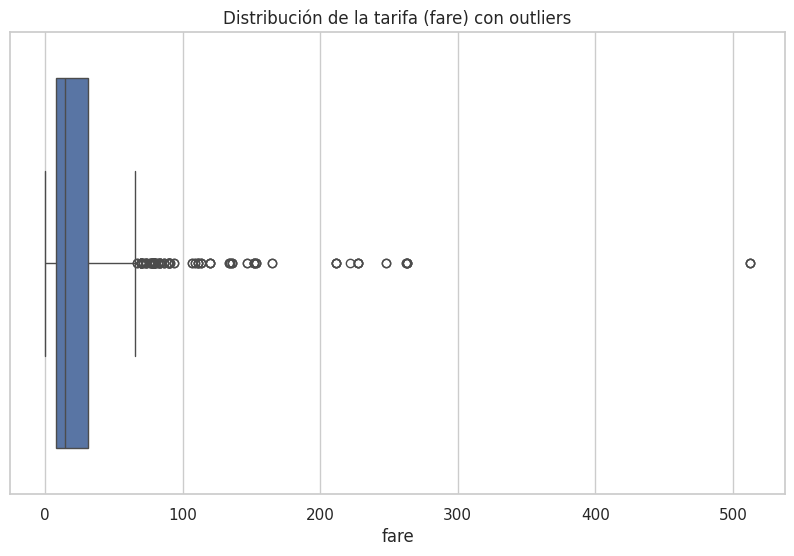

In [ ]:
# Visualizamos la distribución de la tarifa (fare) para detectar outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['fare'])
plt.title("Distribución de la tarifa (fare) con outliers")
plt.show()

### 6.1. Detección de Outliers con IQR (Rango Intercuartílico)

In [ ]:
# Función para detectar outliers basados en IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Detectamos outliers en la columna 'fare'
outliers_fare, lower_bound, upper_bound = detect_outliers_iqr(df, 'fare')

print(f"Número de outliers en 'fare': {len(outliers_fare)}")
print(f"Límite inferior: {lower_bound:.2f}")
print(f"Límite superior: {upper_bound:.2f}")

Número de outliers en 'fare': 116
Límite inferior: -26.72
Límite superior: 65.63


### 6.2. Detección de Outliers con Isolation Forest

El algoritmo Isolation Forest es un método de detección de anomalías basado en árboles que aísla las observaciones identificando aquellas que son diferentes del resto.

In [ ]:
# Usamos Isolation Forest para detectar outliers
# Seleccionamos solo columnas numéricas para el modelo
numeric_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
X_numeric = df[numeric_cols].copy()

# Aplicamos imputación para manejar valores faltantes
X_numeric_imputed = SimpleImputer(strategy='mean').fit_transform(X_numeric)

# Entrenamos el modelo Isolation Forest
iso_forest = IsolationForest(contamination=0.05, random_state=42)
outliers = iso_forest.fit_predict(X_numeric_imputed)

# -1 para outliers, 1 para inliers
df_outliers = df.copy()
df_outliers['outlier'] = outliers

print(f"Número de outliers detectados por Isolation Forest: {sum(outliers == -1)}")
print(f"Porcentaje de outliers: {sum(outliers == -1) / len(outliers) * 100:.2f}%")

Número de outliers detectados por Isolation Forest: 45
Porcentaje de outliers: 5.05%


### 6.3. Tratamiento de Outliers

Existen varias estrategias para tratar los valores atípicos:
1. Eliminarlos
2. Reemplazarlos (capping)
3. Transformarlos

Vamos a implementar la estrategia de capping (limitación).

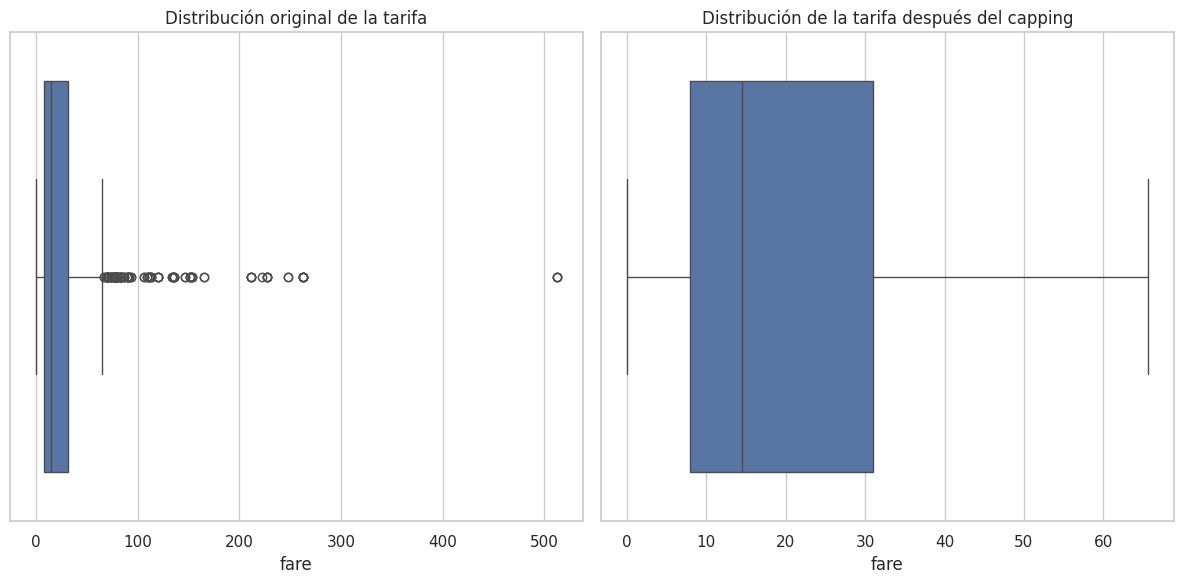

In [ ]:
# Aplicamos capping en la columna 'fare'
df_capped = df.copy()
df_capped['fare'] = df_capped['fare'].clip(lower=lower_bound, upper=upper_bound)

# Visualizamos la distribución después del capping
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['fare'])
plt.title("Distribución original de la tarifa")

plt.subplot(1, 2, 2)
sns.boxplot(x=df_capped['fare'])
plt.title("Distribución de la tarifa después del capping")

plt.tight_layout()
plt.show()

## 7. Selección de Características

La selección de características es el proceso de seleccionar un subconjunto de características relevantes para su uso en la construcción del modelo. Puede mejorar el rendimiento del modelo, reducir el sobreajuste y disminuir el tiempo de entrenamiento.

### 7.1. Análisis de Correlación

Una forma simple de identificar características relevantes es analizar su correlación con la variable objetivo.

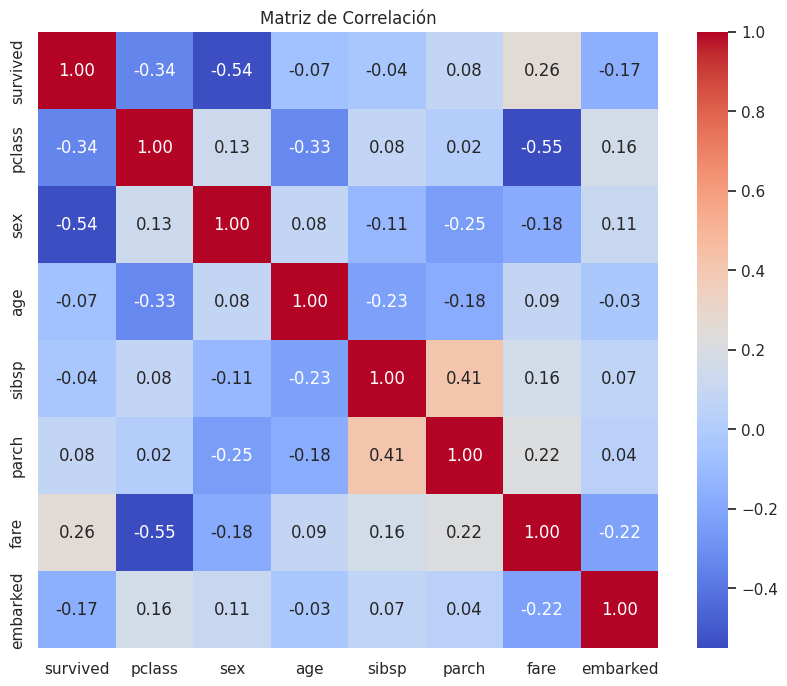

In [ ]:
# Analizamos la correlación entre las variables
df_corr = df_label.copy()

# Matriz de correlación
correlation_matrix = df_corr.corr()

# Visualizamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

In [ ]:
# Correlación con la variable objetivo (sobrevivir)
correlations_with_target = correlation_matrix['survived'].sort_values(ascending=False)
print("Correlación de las variables con 'survived':")
print(correlations_with_target)

Correlación de las variables con 'survived':
survived    1.000000
fare        0.257307
parch       0.081629
sibsp      -0.035322
age        -0.069809
embarked   -0.167675
pclass     -0.338481
sex        -0.543351
Name: survived, dtype: float64


### 7.2. Selección de características basada en estadísticas (SelectKBest)

Scikit-learn proporciona herramientas para la selección automática de características basada en diferentes métricas estadísticas.

Puntuaciones de las características:
    Feature       Score
1       sex  372.405724
0    pclass  115.031272
5      fare   63.030764
6  embarked   25.717286
4     parch    5.963464
2       age    4.353516
3     sibsp    1.110572


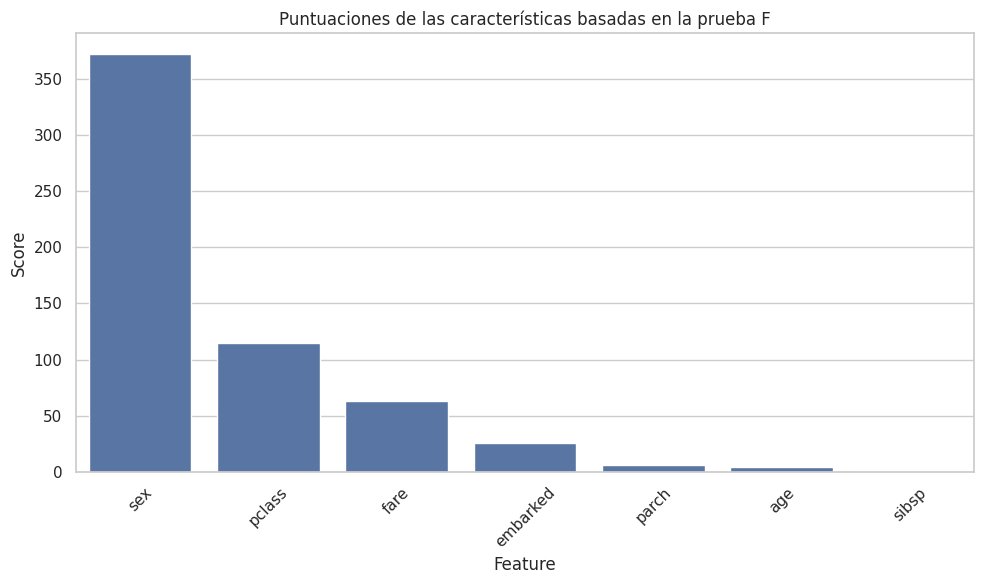

In [ ]:
# Seleccionamos las k mejores características usando la prueba F
X = df_label.drop('survived', axis=1)
y = df_label['survived']

# Imputamos valores faltantes para poder aplicar SelectKBest
X_imputed = SimpleImputer(strategy='mean').fit_transform(X)

# Seleccionamos las 3 mejores características
selector = SelectKBest(score_func=f_classif, k=3)
X_selected = selector.fit_transform(X_imputed, y)

# Obtenemos las puntuaciones y los nombres de las características seleccionadas
scores = selector.scores_
features = X.columns

# Creamos un DataFrame para visualizar los resultados
feature_scores = pd.DataFrame({'Feature': features, 'Score': scores})
feature_scores = feature_scores.sort_values(by='Score', ascending=False)

print("Puntuaciones de las características:")
print(feature_scores)

# Visualizamos las puntuaciones
plt.figure(figsize=(10, 6))
sns.barplot(x='Feature', y='Score', data=feature_scores)
plt.title("Puntuaciones de las características basadas en la prueba F")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Pipelines de Preprocesamiento

Los pipelines en scikit-learn nos permiten encadenar múltiples pasos de preprocesamiento y el modelo final en una sola entidad, lo que facilita la aplicación coherente de las transformaciones tanto en los datos de entrenamiento como en los de prueba.

In [ ]:
# Volvemos a los datos originales para construir un pipeline completo
df = titanic[['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']]

# Separamos los datos en conjuntos de entrenamiento y prueba
X = df.drop('survived', axis=1)
y = df['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (623, 7)
Tamaño del conjunto de prueba: (268, 7)


### 8.1. Construcción de un Pipeline Básico

Vamos a construir un pipeline que combine varios pasos de preprocesamiento y un modelo de clasificación.

In [ ]:
# Definimos los preprocesadores para variables numéricas y categóricas
numeric_features = ['age', 'sibsp', 'parch', 'fare']
categorical_features = ['pclass', 'sex', 'embarked']

# Preprocesamiento para variables numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Preprocesamiento para variables categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combinamos los preprocesadores usando ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Creamos un pipeline completo con preprocesamiento y modelo
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(random_state=42))
])

# Entrenamos el modelo
full_pipeline.fit(X_train, y_train)

# Evaluamos el modelo
y_pred = full_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.4f}")

Precisión del modelo: 0.8060


### 8.2. Comparación de Diferentes Estrategias de Preprocesamiento

Vamos a comparar diferentes estrategias de preprocesamiento para ver su impacto en el rendimiento del modelo.

Solo Imputación: Precisión = 0.8060
Imputación + MinMax: Precisión = 0.7985
Imputación + Robusto + Selección: Precisión = 0.7910


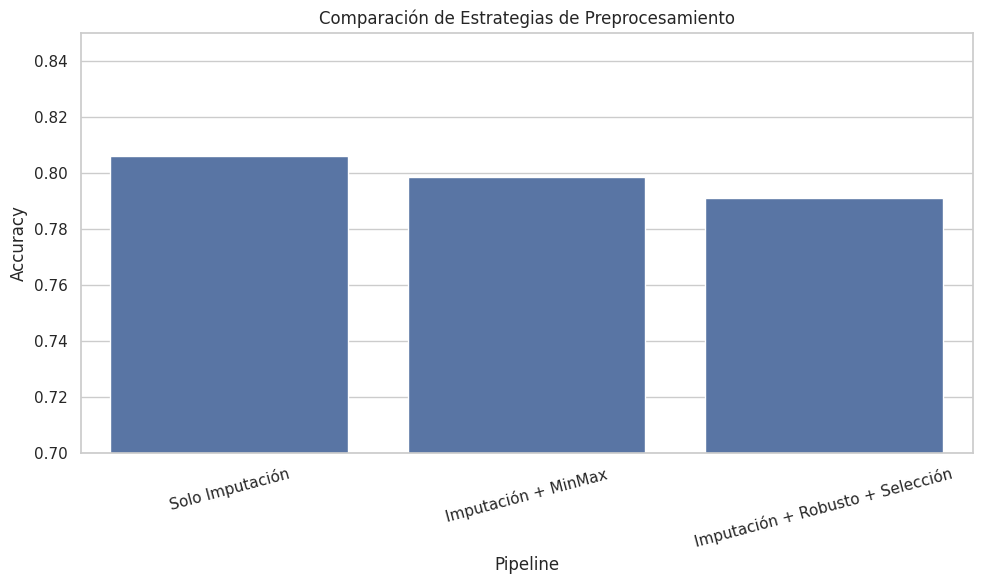

In [ ]:
# Pipeline 1: Solo imputación, sin escalado
preprocessor1 = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor1),
    ('classifier', LogisticRegression(random_state=42))
])

# Pipeline 2: Imputación y escalado MinMax
numeric_transformer2 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler())
])

preprocessor2 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer2, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor2),
    ('classifier', LogisticRegression(random_state=42))
])

# Pipeline 3: Imputación, escalado robusto y selección de características
numeric_transformer3 = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

preprocessor3 = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer3, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor3),
    ('selector', SelectKBest(score_func=f_classif, k=5)),
    ('classifier', LogisticRegression(random_state=42))
])

# Entrenamos y evaluamos los pipelines
pipelines = [pipeline1, pipeline2, pipeline3]
pipeline_names = ['Solo Imputación', 'Imputación + MinMax', 'Imputación + Robusto + Selección']
results = []

for name, pipeline in zip(pipeline_names, pipelines):
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append((name, accuracy))
    print(f"{name}: Precisión = {accuracy:.4f}")

# Visualizamos los resultados
results_df = pd.DataFrame(results, columns=['Pipeline', 'Accuracy'])
plt.figure(figsize=(10, 6))
sns.barplot(x='Pipeline', y='Accuracy', data=results_df)
plt.title("Comparación de Estrategias de Preprocesamiento")
plt.ylim(0.7, 0.85)  # Ajustamos los límites para mejor visualización
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()

### 8.3. Comparación con Diferentes Clasificadores

Vamos a comparar cómo afecta el preprocesamiento a diferentes algoritmos de clasificación.

Regresión Logística: Precisión = 0.8060


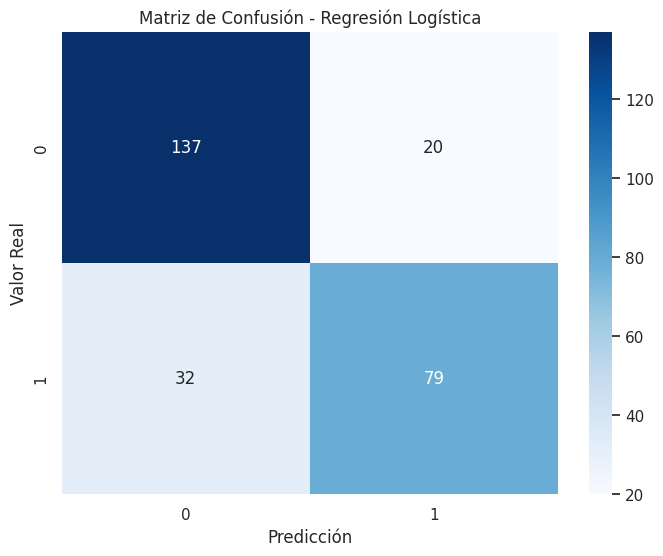

Regresión Logística + L1: Precisión = 0.7948


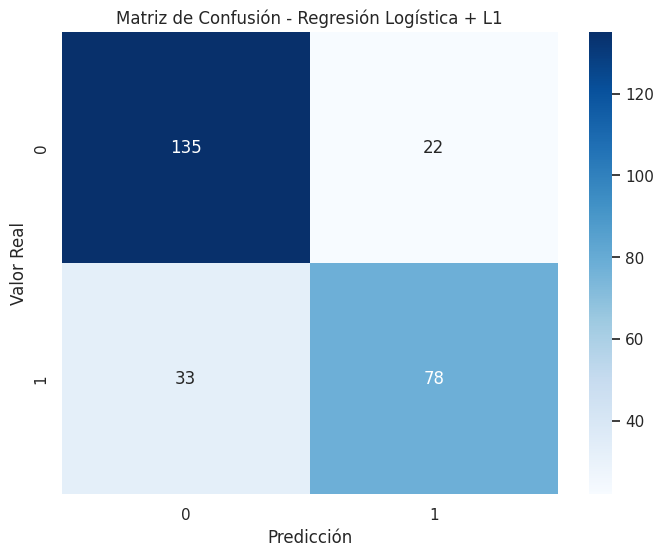

Regresión Logística + L2: Precisión = 0.7985


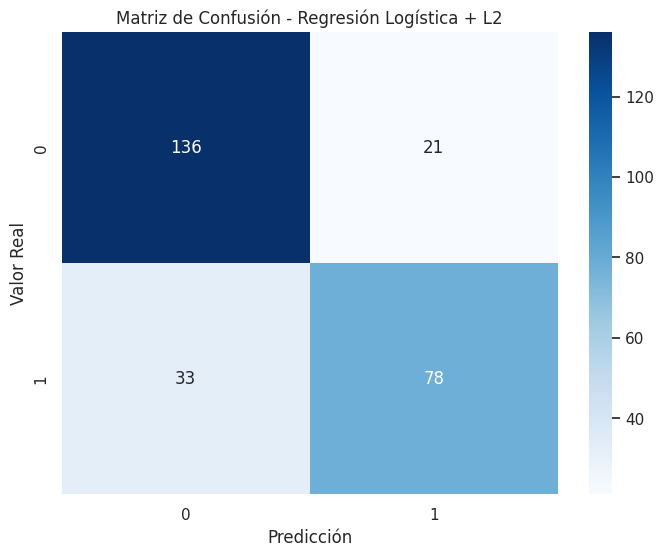

Regresión Logística + elasticnet: Precisión = 0.7985


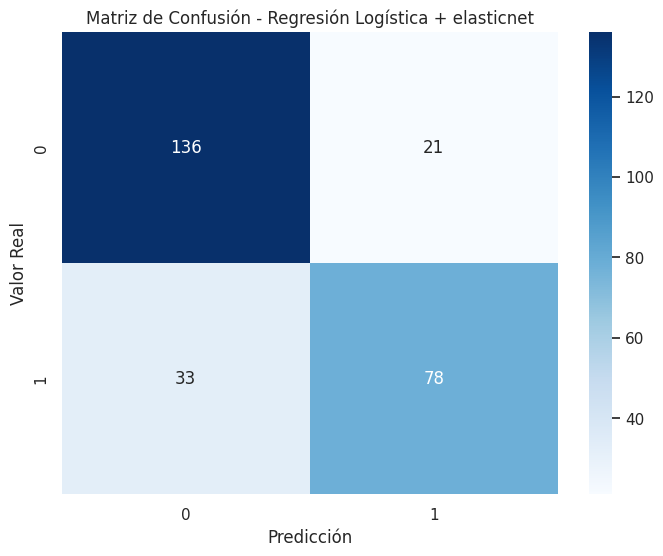

In [ ]:
# Utilizamos el mejor preprocesador basado en los resultados anteriores
best_preprocessor = preprocessor2  # Cambia esto según los resultados obtenidos

# Comparamos diferentes clasificadores
classifiers = [
    ('Regresión Logística', LogisticRegression(penalty=None,random_state=3)),
    ('Regresión Logística + L1', LogisticRegression(penalty="l1",solver='liblinear',random_state=3)),
    ('Regresión Logística + L2', LogisticRegression(penalty="l2",random_state=3)),
    ('Regresión Logística + elasticnet', LogisticRegression(penalty="elasticnet",solver='saga', l1_ratio=0.5,random_state=3))
]

classifier_results = []

for name, classifier in classifiers:
    # Creamos el pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', best_preprocessor),
        ('classifier', classifier)
    ])

    # Entrenamos y evaluamos
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    classifier_results.append((name, accuracy))
    print(f"{name}: Precisión = {accuracy:.4f}")

    # Mostramos la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Matriz de Confusión - {name}")
    plt.xlabel('Predicción')
    plt.ylabel('Valor Real')
    plt.show()

## 9. Conclusiones y Buenas Prácticas

Después de explorar varias técnicas de preprocesamiento de datos, podemos destacar algunas conclusiones y buenas prácticas:

### Importancia del Preprocesamiento

1. **Impacto en el rendimiento**: Hemos visto cómo diferentes estrategias de preprocesamiento pueden afectar significativamente el rendimiento de los modelos.

2. **No existe una solución única**: La mejor estrategia de preprocesamiento depende del conjunto de datos y del algoritmo utilizado.

3. **Automatización con pipelines**: Los pipelines de scikit-learn facilitan la aplicación coherente de múltiples pasos de preprocesamiento, evitando fugas de datos entre los conjuntos de entrenamiento y prueba.

### Buenas Prácticas

1. **Exploración de datos antes del preprocesamiento**: Entender la estructura y características de los datos antes de aplicar cualquier transformación.

2. **Manejo adecuado de valores faltantes**: Utilizar estrategias apropiadas según el contexto y la naturaleza de los datos.

3. **Codificación adecuada de variables categóricas**: Elegir entre Label Encoding y One-Hot Encoding según las características de las variables y los requisitos del algoritmo.

4. **Escalado de características**: Aplicar técnicas de escalado para mejorar el rendimiento de algoritmos sensibles a la escala de las variables.

5. **Detección y tratamiento de outliers**: Identificar y manejar adecuadamente los valores atípicos que podrían distorsionar los resultados.

6. **Selección de características relevantes**: Eliminar variables redundantes o irrelevantes para mejorar el rendimiento y la interpretabilidad de los modelos.

7. **Validación cruzada**: Utilizar técnicas de validación cruzada para evaluar de manera robusta el rendimiento de los modelos.

8. **Documentación del proceso**: Documentar cada paso del preprocesamiento para garantizar la reproducibilidad y facilitar la comprensión del flujo de trabajo.

### Resumen Final

El preprocesamiento de datos es una etapa crítica en cualquier proyecto de aprendizaje automático. Un preprocesamiento adecuado puede mejorar significativamente el rendimiento de los modelos, facilitar su interpretación y acelerar el tiempo de entrenamiento. Como hemos visto, scikit-learn proporciona una amplia gama de herramientas para realizar estas tareas de manera eficiente y consistente.

Recuerda que el preprocesamiento no es una tarea aislada, sino parte integral del proceso iterativo de desarrollo de modelos de aprendizaje automático. A medida que obtengas más información sobre tus datos y los requisitos de tu problema, es posible que necesites ajustar tus estrategias de preprocesamiento.